In [1]:
!pip install -q kaggle
# dataset downloader functions
import subprocess
import os
def dataset_search(sr_term):
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/PYTHON PROJECTS/KAGGLE"
  data_list = subprocess.Popen("kaggle datasets list -s "+str(sr_term),shell=True,stdout=subprocess.PIPE).stdout
  data_list = data_list.read()
  print(data_list.decode())
def dataset_download(sr_term):
    %cd /content/drive/MyDrive/PYTHON PROJECTS/DATASETS
    k = subprocess.Popen("kaggle datasets download "+str(sr_term),shell=True,stdout=subprocess.PIPE).stdout
    k = k.read()
    print(k.decode())
def dataset_unzip(sr_term):
    %cd /content/drive/MyDrive/PYTHON PROJECTS/DATASETS
    k = subprocess.Popen("unzip "+str(sr_term)+" -d /content/dataset",shell=True)

In [3]:
# download and set up dataset
dataset_search('cat-dog')

ref                                                        title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
tongpython/cat-and-dog                                     Cat and Dog                                         218MB  2018-04-26 10:56:50          35171  
chetankv/dogs-cats-images                                  Dogs & Cats Images                                  435MB  2018-04-19 18:20:08          18733  
mmoreaux/audio-cats-and-dogs                               Audio Cats and Dogs                                  97MB  2017-10-05 09:40:26           6415  
biaiscience/dogs-vs-cats                                   Dogs vs Cats                                        817MB  2017-12-05 14:03:33           9697  
shaunthesheep/microsoft-catsvsdogs-dataset                 Cats-vs-Dog

In [4]:
dataset_download('tongpython/cat-and-dog')

/content/drive/MyDrive/PYTHON PROJECTS/DATASETS




In [2]:
dataset_unzip('cat-and-dog.zip')

/content/drive/MyDrive/PYTHON PROJECTS/DATASETS


In [1]:
# importing libraries
import tensorflow.keras as keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# check folder for the datasets
cat_train_file = glob.glob('/content/dataset/training_set/training_set/cats/*.jpg')
dog_train_file = glob.glob('/content/dataset/training_set/training_set/dogs/*.jpg')

cat_test_file = glob.glob('/content/dataset/test_set/test_set/cats/*.jpg')
dog_test_file = glob.glob('/content/dataset/test_set/test_set/dogs/*.jpg')

print(len(cat_test_file))
print(len(dog_test_file))
print(len(cat_train_file))
print(len(dog_train_file))

1011
1012
4000
4005


In [3]:
# read all the images and store into the array
cat_train = []
dog_train = []
cat_test = []
dog_test = []

for file_name in cat_train_file:
  img = Image.open(os.path.normpath(file_name))
  img = img.resize((300,300))
  cat_train.append(img)

for file_name in dog_train_file:
  img = Image.open(os.path.normpath(file_name))
  img = img.resize((300,300))
  dog_train.append(img)

for file_name in cat_test_file:
  img = Image.open(os.path.normpath(file_name))
  img = img.resize((300,300))
  cat_test.append(img)

for file_name in dog_test_file:
  img = Image.open(os.path.normpath(file_name))
  img = img.resize((300,300))
  dog_test.append(img)


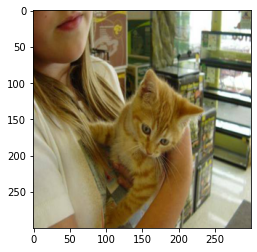

In [4]:
plt.imshow(cat_train[100])

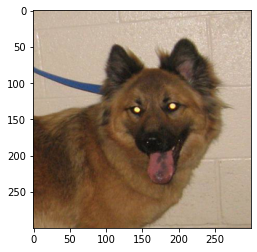

In [5]:
plt.imshow(dog_train[100])

In [6]:
# data preprocessing
y_train = np.concatenate((np.zeros(len(cat_train)),np.ones(len(dog_train))),axis=0)
y_test = np.concatenate((np.zeros(len(cat_test)),np.ones(len(dog_test))),axis=0)

temp_data = []
for alpha in cat_train:
  img = np.array(alpha)
  temp_data.append(img)
for alpha in dog_train:
  img = np.array(alpha)
  temp_data.append(img)
x_train = np.array(temp_data)

temp_data = []
for alpha in cat_test:
  img = np.array(alpha)
  temp_data.append(img)
for alpha in dog_test:
  img = np.array(alpha)
  temp_data.append(img)
x_test = np.array(temp_data)
y_train_f = keras.utils.to_categorical(y_train,num_classes=2)
y_test_f = keras.utils.to_categorical(y_test,num_classes=2)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 150, 150, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 64)        0   

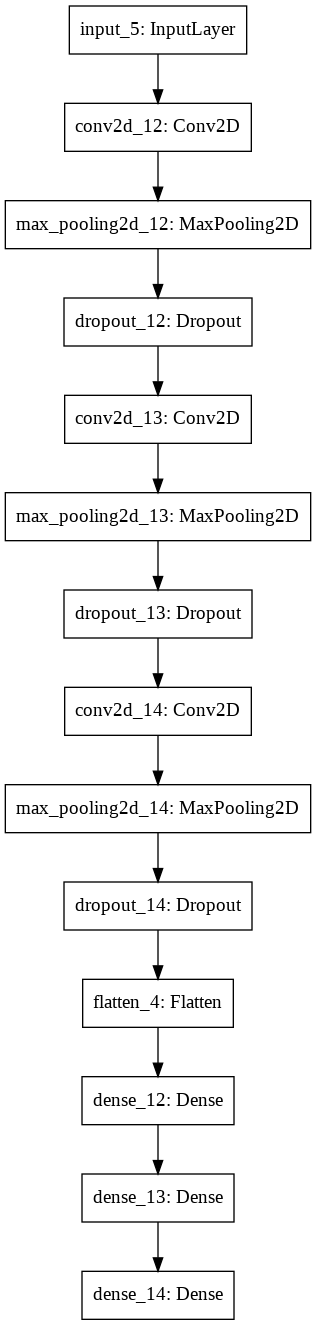

In [15]:
# define the classifier network

input = keras.Input((300,300,3))
previous_layer = input  
units = 10

c1 = keras.layers.Conv2D(64,kernel_size=(3,3),padding='same')(input)
m1 = keras.layers.MaxPool2D(pool_size=(2,2))(c1)
d1 = keras.layers.Dropout(0.2)(m1)

c2 = keras.layers.Conv2D(64,kernel_size=(3,3),padding='same')(d1)
m2 = keras.layers.MaxPool2D(pool_size=(2,2))(c2)
d2 = keras.layers.Dropout(0.2)(m2)

c3 = keras.layers.Conv2D(64,kernel_size=(3,3),padding='same')(d2)
m3 = keras.layers.MaxPool2D(pool_size=(2,2))(c3)
d3 = keras.layers.Dropout(0.2)(m3)

flat1 = keras.layers.Flatten()(d3)
d1 = keras.layers.Dense(units=512,activation='relu')(flat1)
d2 = keras.layers.Dense(units=64,activation='relu')(d1)
out = keras.layers.Dense(units=2,activation='softmax')(d2)

model = keras.Model(input,out)
model.summary()
keras.utils.plot_model(model,'model.png')


In [23]:
opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='/content/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)
history = model.fit(x_train,y_train_f,batch_size=128,epochs=40,callbacks=[es,model_checkpoint_callback],validation_split=0.2)

Epoch 1/40
51/51 [==============================] - 14s 273ms/step - loss: 3309.8453 - accuracy: 0.5313 - val_loss: 63.9460 - val_accuracy: 0.7071

Epoch 00001: val_accuracy improved from -inf to 0.70706, saving model to /content/checkpoint
Epoch 2/40
51/51 [==============================] - 14s 270ms/step - loss: 46.6831 - accuracy: 0.5322 - val_loss: 813.1104 - val_accuracy: 0.1911

Epoch 00002: val_accuracy did not improve from 0.70706
Epoch 3/40
51/51 [==============================] - 14s 271ms/step - loss: 7.7981 - accuracy: 0.6058 - val_loss: 129.7103 - val_accuracy: 0.6102

Epoch 00003: val_accuracy did not improve from 0.70706
Epoch 4/40
51/51 [==============================] - 14s 272ms/step - loss: 3.6048 - accuracy: 0.6404 - val_loss: 18.6059 - val_accuracy: 0.9113

Epoch 00004: val_accuracy improved from 0.70706 to 0.91131, saving model to /content/checkpoint
Epoch 5/40
51/51 [==============================] - 14s 271ms/step - loss: 3.5447 - accuracy: 0.6415 - val_loss: 8.

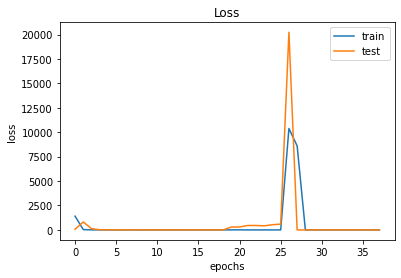

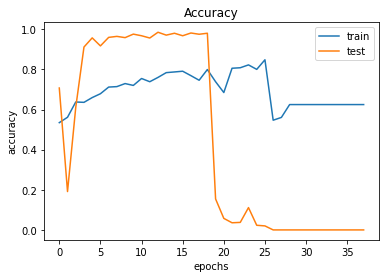

Accuracy:0.5051903128623962


In [24]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()
model.load_weights('/content/checkpoint')
_, test_acc = model.evaluate(x_test, y_test_f, verbose=0)
print("Accuracy:"+str(test_acc))

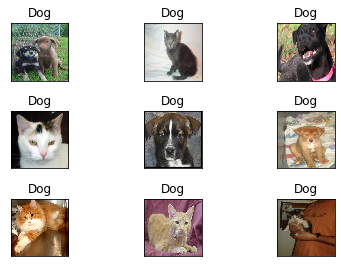

In [25]:
# The network is having only 50%  accuracy thus can be conlcuded as not a good network
fig = plt.figure()
for i in range(9):
  x = np.random.randint(0,2000,1)[0]
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(np.reshape(x_test[x],(x_test[x].shape[0],x_test[x].shape[1],x_test[x].shape[2])),interpolation='none')
  y_pred = model.predict(np.reshape(x_test[x],(1,x_test[x].shape[0],x_test[x].shape[1],x_test[x].shape[2])))
  if np.argmax(y_pred[0]) == 0:
    plt.title('Cat')
  else:
    plt.title('Dog')
  plt.xticks([])
  plt.yticks([])
fig.show()

In [19]:
y_test_f = keras.utils.to_categorical(y_test,num_classes=2)